# Task 4 Differentiate Genres

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px    

In [2]:
data4= pd.read_csv("W:\intern min project\spotify_data\data_w_genres.csv")

In [3]:
data4.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


In [4]:
song_features = pd.DataFrame()
# normalizer instance
scaler = MinMaxScaler()
for col in data4.iloc[:,:-1].columns:      # excluding year col i.e, of int64 type
    if data4[col].dtypes in ['float64', 'int64']:
        # adding normalized col
        scaler.fit(data4[[col]])
        song_features[col] = scaler.transform(data4[col].values.reshape(-1,1)).ravel() 

In [5]:
km = KMeans()
k_rng = range(1,200)  # k value
sse = [] # sse value for each k
for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(song_features.sample(1000))
    # calculating sse
    sse.append(km.inertia_) 

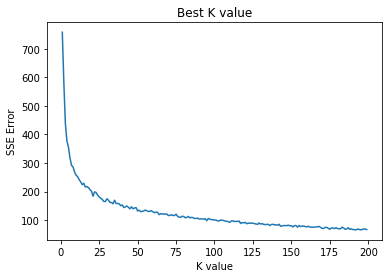

In [6]:
plt.plot(k_rng,sse)
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('Best K value')
# plt.ylim(0,400)
# plt.xlim(0,100)
plt.show()

In [7]:
km = KMeans(n_clusters=25)
predicted_genres = km.fit_predict(song_features)

In [8]:
song_features['predicted_genres'] = predicted_genres
song_features['predicted_genres'] = song_features['predicted_genres'].apply(lambda x: 'Genre'+ str(x))

In [9]:
song_features.sample(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,predicted_genres
15264,0.967871,0.518256,0.024770,0.252000,0.010200,0.202825,0.699390,0.059959,0.559485,0.679112,0.052632,0.636364,1.0,0.000315,Genre22
12117,0.636546,0.638945,0.026202,0.856000,0.001950,0.245207,0.937188,0.054253,0.769903,0.939455,0.431579,0.454545,0.0,0.000315,Genre6
4599,0.988956,0.536511,0.023763,0.840667,0.527030,0.706021,0.856982,0.197787,0.653751,0.728221,0.007018,0.909091,1.0,0.000631,Genre3
19975,0.991968,0.350913,0.027414,0.202000,0.102000,0.199798,0.804881,0.032365,0.473848,0.254289,0.000000,0.818182,1.0,0.000315,Genre23
1180,0.615562,0.371785,0.047458,0.162070,0.713321,0.107094,0.644390,0.043423,0.400308,0.148466,0.424211,0.454545,1.0,0.005992,Genre7
19978,0.922892,0.284178,0.035083,0.225000,0.050796,0.285671,0.756451,0.044876,0.569311,0.155399,0.040000,0.727273,1.0,0.001261,Genre23
8435,0.878514,0.573022,0.030388,0.400000,0.000015,0.372351,0.859900,0.041805,0.519539,0.709384,0.000000,0.545455,1.0,0.000000,Genre22
11963,0.337349,0.601420,0.039914,0.855000,0.000021,0.127144,0.840843,0.080394,0.441727,0.653885,0.568421,0.636364,1.0,0.000315,Genre8
3203,0.021185,0.664300,0.040763,0.756000,0.000292,0.284561,0.792149,0.247925,0.427228,0.890010,0.431579,0.545455,1.0,0.000315,Genre8
16170,0.188027,0.719067,0.039380,0.882750,0.000267,0.116271,0.863939,0.044217,0.661722,0.955600,0.526316,0.181818,1.0,0.002208,Genre15


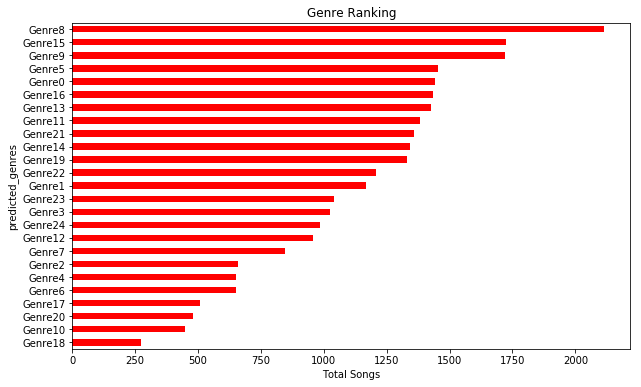

In [10]:
genres_grp = song_features.groupby(['predicted_genres']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='red')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()